In [1]:
import NLP.ngrams as ngrams

In [2]:
from sklearn import svm

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import sys

In [6]:
data_set = pd.read_csv('data/DataReleaseDec2011/formspring_data.csv')

In [7]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26315 entries, 0 to 26314
Data columns (total 2 columns):
text     26315 non-null object
label    26315 non-null bool
dtypes: bool(1), object(1)
memory usage: 231.4+ KB


In [8]:
data_set.head()

,text,label
0,what's your favorite song? :D,False
1,I like too many songs to have a favorite,False
2,<3,False
3,</3 ? haha jk! <33,False
4,"""hey angel you duh sexy""",False


In [9]:
labels = list(data_set['label'].astype(int))

In [10]:
features = []

In [11]:
parser = ngrams.ngramParser()

In [12]:
for index, row in data_set.iterrows():
    sys.stdout.write('\r'+str(index))
    sys.stdout.flush()
    try:
        features.append(np.array(list(parser.get_ngrams(row['text']).values())).astype(float))
    except:
        pass

26314

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
clf = svm.SVC(gamma='auto', C=100)
clf.fit(np.asarray(features), np.asarray(labels))

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
test_sentence = 'hello, good friend! I love you! <3'
test = [np.array(list(parser.get_ngrams(test_sentence).values())).astype(float)]
print(clf.predict(test))

[0]


In [81]:
test_sentence = 'you\'re FUCKING retarded'
test = [np.array(list(parser.get_ngrams(test_sentence).values())).astype(float)]
print(clf.predict(test))

[0]


In [83]:
test_sentence = 'shit talking bitch MOTHERFUCKER loving piece of shit incredible excelent'
test = [np.array(list(parser.get_ngrams(test_sentence).values())).astype(float)]
print(clf.predict(test))

[1]


In [76]:
x = []
y = []
z = []
colors = []
for i in range(0,len(features)):
    x.append(features[i][0])
    y.append(features[i][1])
    z.append(features[i][2])
    if labels[i] == 0:
        colors.append('b')
    else:
        colors.append('r')

In [77]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

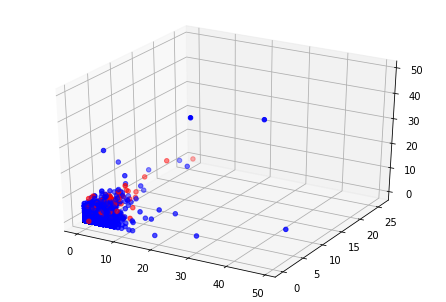

In [78]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x, y, z, c=colors)